# Import require libraries function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

# Loding dataset

In [2]:
dataset = pd.read_excel(r"C:\Users\shank\Downloads\Copy of loan.xlsx",sheet_name="loan")

# Printing the first five rows of the DataFrame

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Dataset size checking

In [4]:
dataset.shape

(614, 13)

# Summary information about dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Five-number summary 

In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking duplicate values

In [7]:
dataset.duplicated().sum()

0

# Number of missing values in each columns

In [8]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Outliers checking

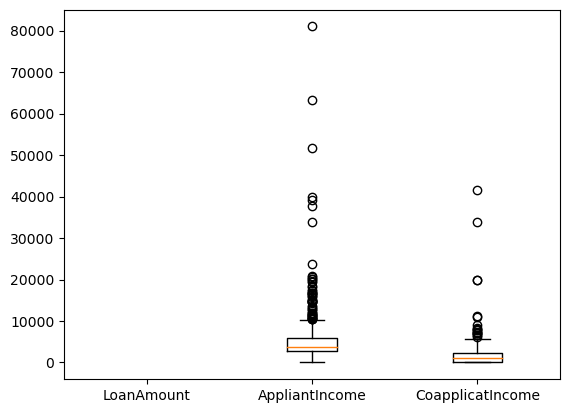

In [9]:
plt.boxplot([dataset['LoanAmount'],dataset['ApplicantIncome'],dataset['CoapplicantIncome']])
plt.xticks([1,2,3],['LoanAmount','AppliantIncome','CoapplicatIncome'])
plt.show()

# Plotting histogram on LoanAmount column

<Axes: >

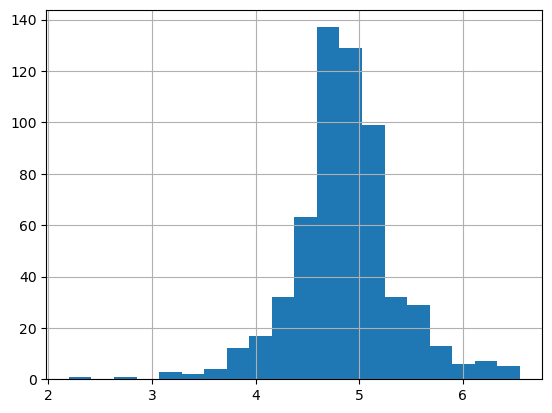

In [10]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

In [11]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<Axes: >

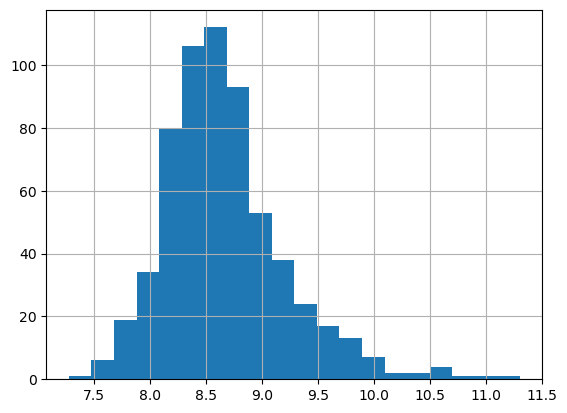

In [11]:
dataset['Totalincome']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['Totalincome_log']=np.log(dataset['Totalincome'])
dataset['Totalincome_log'].hist(bins=20)

# Replacing null values with mode and mean

In [12]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)

dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Totalincome          0
Totalincome_log      0
dtype: int64

# Number of people who takes loan as group by gender

Number of people who takes loan as group by gender: 
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

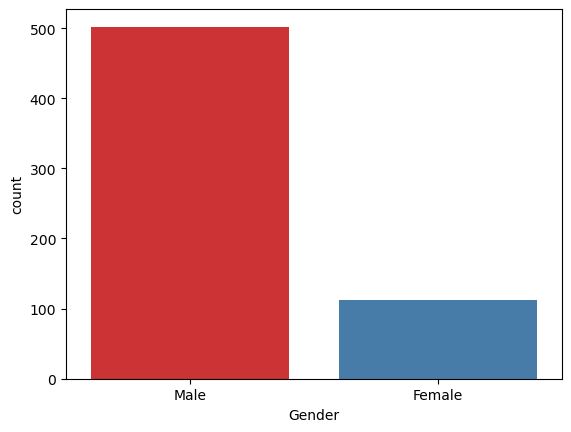

In [13]:
print("Number of people who takes loan as group by gender: ")
print(dataset['Gender'].value_counts())
sns.countplot(data=dataset,x="Gender",palette= 'Set1')

# Number of people who takes loan as group by marital status

Number of people who takes loan as group by marital status: 
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

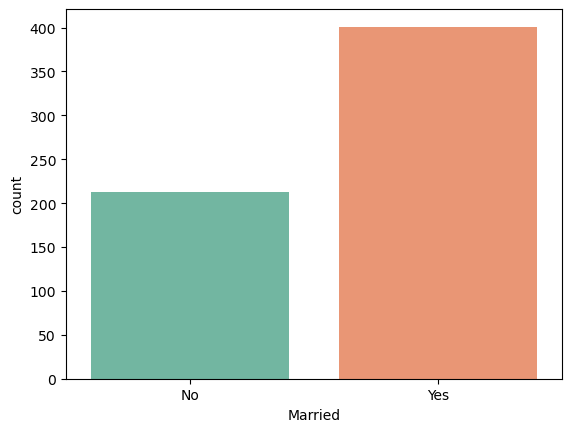

In [14]:
print("Number of people who takes loan as group by marital status: ")
print(dataset['Married'].value_counts())
sns.countplot(data=dataset,x="Married",palette= 'Set2')

# Number of people who takes loan as group by Dependents

Number of people who takes loan as group by Dependents: 
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

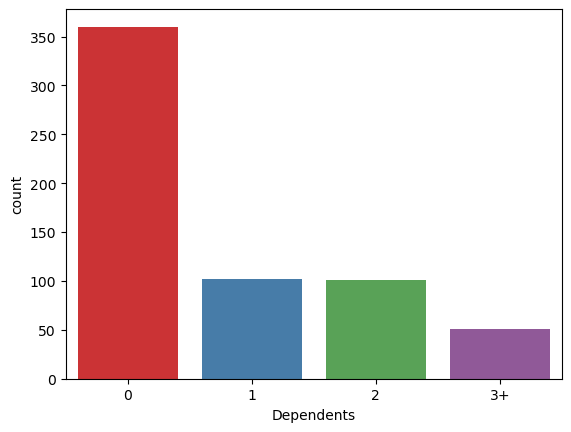

In [15]:
print("Number of people who takes loan as group by Dependents: ")
print(dataset['Dependents'].value_counts())
sns.countplot(data=dataset,x="Dependents",palette= 'Set1')

# Number of people who takes loan as group by Self_Employed

Number of people who takes loan as group by Self_Employed: 
No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

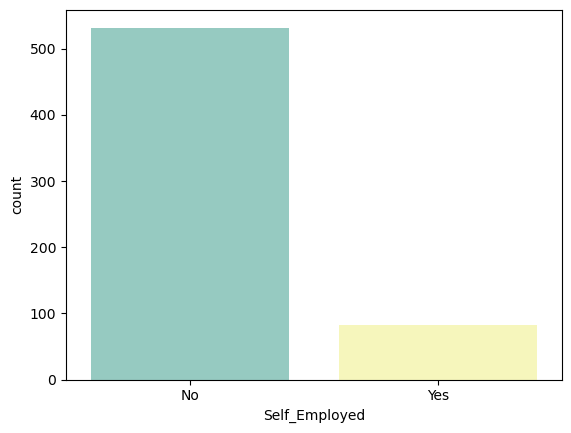

In [16]:
print("Number of people who takes loan as group by Self_Employed: ")
print(dataset['Self_Employed'].value_counts())
sns.countplot(data=dataset,x="Self_Employed",palette= 'Set3')

# Number of people who takes loan as group by LoanAmount

Number of people who takes loan as group by LoanAmount: 
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

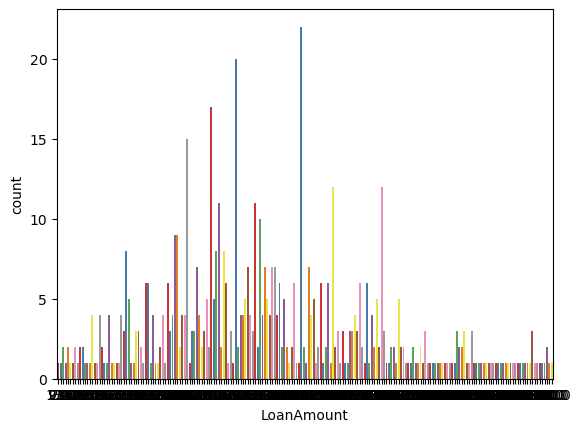

In [17]:
print("Number of people who takes loan as group by LoanAmount: ")
print(dataset['LoanAmount'].value_counts())
sns.countplot(data=dataset,x="LoanAmount",palette= 'Set1')

# Number of people who takes loan as group by Credit_History

Number of people who takes loan as group by Credit_History: 
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

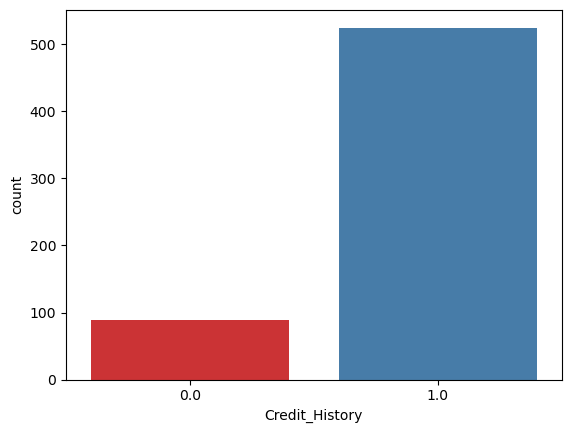

In [18]:
print("Number of people who takes loan as group by Credit_History: ")
print(dataset['Credit_History'].value_counts())
sns.countplot(data=dataset,x="Credit_History",palette= 'Set1')

# Education vs Loan_Status

<Axes: xlabel='Education', ylabel='count'>

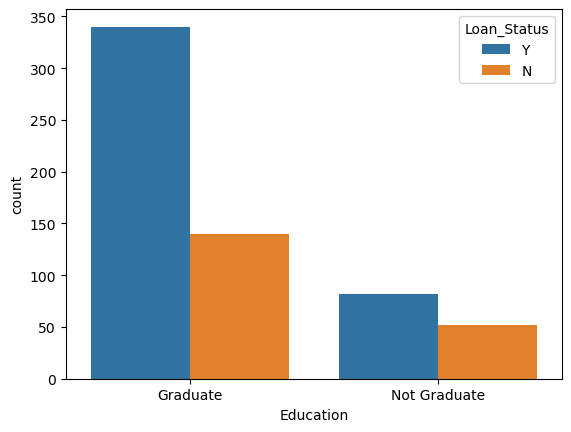

In [19]:
sns.countplot(data=dataset,x="Education",hue="Loan_Status")

# Correlation matrix

C:\Users\shank\AppData\Local\Temp\ipykernel_22232\3387572453.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

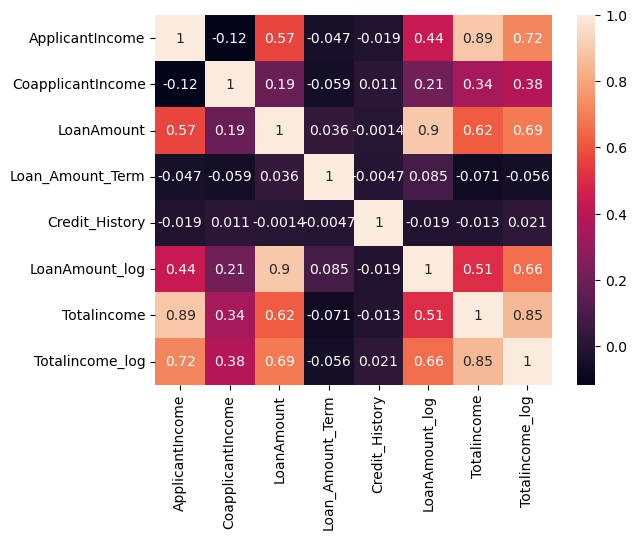

In [20]:
sns.heatmap(dataset.corr(),annot=True)

# Using Lebel encoding for convert categorical to numerical data

In [21]:
dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [22]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Totalincome,Totalincome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,4.189655,3000.0,8.006368


In [23]:
dataset['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [24]:
dataset['Dependents']=dataset['Dependents'].replace("3+",4)

In [25]:
dataset['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [26]:
dataset.replace({'Gender':{'Male':1,'Female':0},'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},
                'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

# Printing first five rows after encoded

In [27]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Totalincome,Totalincome_log
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.857444,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


# Separating dependent variable and independent variables

In [28]:
x = dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = dataset['Loan_Status']

# Printing first five rows of independent variables

In [29]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Totalincome,Totalincome_log
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,4.857444,5849.0,8.674026
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,4.852030,6091.0,8.714568
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,4.189655,3000.0,8.006368
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,4.787492,4941.0,8.505323
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,4.948760,6000.0,8.699515


# Printing first five rows of dependent variable

In [30]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# Splitting train and test date

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

# Standardizing train and test data

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

# Prediction using classification algorithms

# Applying RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

# Accuracy score & Y_prediction

In [34]:
from sklearn import metrics
y_predict = rf_clf.predict(x_test)
print("Accuracy of random forest clf is: ", metrics.accuracy_score(y_predict,y_test))
y_predict

Accuracy of random forest clf is:  0.8130081300813008


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

# Applying LogisticsRegression

In [35]:
from sklearn.linear_model import LogisticRegression
lg_reg = LogisticRegression()
lg_reg.fit(x_train,y_train)

LogisticRegression()

In [36]:
from sklearn import metrics
y_predict = lg_reg.predict(x_test)
print("Accuracy of logistics reg is: ", metrics.accuracy_score(y_predict,y_test))
y_predict

Accuracy of logistics reg is:  0.8373983739837398


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

# Applying DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
de_clf = DecisionTreeClassifier()
de_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
from sklearn import metrics
y_predict = de_clf.predict(x_test)
print("Accuracy of decisiontree clf is: ", metrics.accuracy_score(y_predict,y_test))
y_predict

Accuracy of decisiontree clf is:  0.5934959349593496


array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)